In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
import pandas as pd
from lib.style import color
import pickle

from lib.graphs import G_Witvliet, G_White, getCleanGraph
G_W1 = G_Witvliet[0]
G_W7 = G_Witvliet[6]
G_W8 = G_Witvliet[7]

G_clean = getCleanGraph()

G_SEEM_FC = nx.read_gexf('data/Kaiser/131/compiled/xyzp_d_SEEM_FC.gexf')


In [2]:
%store -r rand_Graphs_W1
%store -r rand_Graphs_W7
%store -r rand_Graphs_W8
%store -r rand_Graphs_White

%store -r RDDAM_Graphs_W1
%store -r RDDAM_Graphs_W7
%store -r RDDAM_Graphs_W8
%store -r RDDAM_Graphs_White

# %store -r G_SEEM_FC
%store -r SEEM_White
%store -r SEEM_Array_Witvliet

In [3]:
def avgDistance(G):
  distances = [e[2] for e in G.out_edges.data('distance')]
  return np.mean(distances)

In [4]:
#clustering coefficient

def averageMetric(graphs, metric):
  outputs = np.array([])
  for g in graphs:
    out = metric(g)
    outputs = np.append(outputs, out)
  return np.mean(outputs)

def getData(metric):
  res_SEEM_W1 = averageMetric(SEEM_Array_Witvliet[0], metric)
  res_SEEM_W8 = averageMetric(SEEM_Array_Witvliet[7], metric)
  res_W1 = metric(G_W1)
  res_W8 = averageMetric([G_W7,G_W8, G_White], metric)
  res_rand_W1 = averageMetric(rand_Graphs_W1, metric)
  res_rand_W8 = averageMetric(rand_Graphs_W8, metric)
  res_RDDA_W1 = averageMetric(RDDAM_Graphs_W1, metric)
  res_RDDA_W8 = averageMetric(RDDAM_Graphs_W8, metric)
  
  return [res_SEEM_W1, res_RDDA_W1, res_rand_W1, res_W1, res_SEEM_W8, res_RDDA_W8, res_rand_W8, res_W8]


In [5]:

def listMetrics2(graph, metric):
  outputs = np.array([])
  for g in graph:
    out = metric(g)
    outputs = np.append(outputs, out)
  return outputs

def getData2(metric):
  res_SEEM_W1 =listMetrics2(SEEM_Array_Witvliet[0], metric)
  res_SEEM_W8 =listMetrics2(SEEM_Array_Witvliet[7], metric)
  res_W1 = metric(G_W1)
  res_W8 = listMetrics2([G_W7,G_W8, G_White], metric)
  res_rand_W1 =listMetrics2(rand_Graphs_W1, metric)
  res_rand_W8 =listMetrics2(rand_Graphs_W8, metric)
  res_RDDA_W1 =listMetrics2(RDDAM_Graphs_W1, metric)
  res_RDDA_W8 =listMetrics2(RDDAM_Graphs_W8, metric)
  
  return [res_SEEM_W1, res_RDDA_W1, res_rand_W1, res_W1, res_SEEM_W8, res_RDDA_W8, res_rand_W8, res_W8]


In [6]:
def biDirectionalLinks(G):
  n_links = 0
  for e in G.edges():
    if (e[1], e[0]) in G.edges():
      n_links += 1
  return ( n_links / 2 )

In [7]:
def avgInDegree(G):
  return np.mean(list(dict(G.in_degree()).values()))
  
def avgOutDegree(G):
  return np.mean(list(dict(G.out_degree()).values()))

def avgDegree(G):
  return np.mean(list(dict(G.degree()).values()))

def avgClosenessCentrality(G):
  return np.mean(list(nx.closeness_centrality(G).values()))

In [8]:
### RUN THIS OVER NIGHT ###

%store -r SEEM_Array_Witvliet_Rand SEEM_White_Rand

def getData3(metric):

  seemAdult = SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White
  rddaAdult = RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White
  randAdult = rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White
  reemAdult = SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand

  res_SEEM_W1 =listMetrics2(SEEM_Array_Witvliet[0], metric)
  res_SEEM_W8 =listMetrics2(seemAdult, metric)
  res_W1 = metric(G_W1)
  res_W8 = listMetrics2([G_W7,G_W8, G_White], metric)
  res_rand_W1 =listMetrics2(rand_Graphs_W1, metric)
  res_rand_W8 =listMetrics2(randAdult, metric)
  res_RDDA_W1 =listMetrics2(RDDAM_Graphs_W1, metric)
  res_RDDA_W8 =listMetrics2(rddaAdult, metric)
  res_REEM_W1 =listMetrics2(SEEM_Array_Witvliet_Rand[0], metric)
  res_REEM_W8 =listMetrics2(reemAdult, metric)
  
  return [res_SEEM_W1, res_RDDA_W1, res_rand_W1, res_REEM_W1, res_W1, res_SEEM_W8, res_RDDA_W8, res_rand_W8, res_REEM_W8, res_W8]


In [9]:

# stats3: dict = {'Clustering Coefficient': getData3(nx.average_clustering),
# 'Edge Distance': getData3(avgDistance),
# 'Average Connectivity': getData3(nx.average_node_connectivity),
# 'Total Bidirectional Links': getData3(biDirectionalLinks)}
# %store stats3
# print(stats3)

# import pickle

# pickle.dump(stats3, open('data/pickles/stats3.pkl', 'wb'))

In [10]:
%store -r SEEM_Array_Witvliet_Rand SEEM_White_Rand

reemAdult = SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand
metric = nx.average_node_connectivity
res_REEM_W1 =listMetrics2(SEEM_Array_Witvliet_Rand[0], metric)
pickle.dump(res_REEM_W1, open('data/pickles/reem1.pkl', 'wb'))
res_REEM_W8 =listMetrics2(SEEM_Array_Witvliet_Rand[7], metric)
pickle.dump(res_REEM_W8, open('data/pickles/reem7.pkl', 'wb'))

In [11]:
res_REEM_W7 =listMetrics2(SEEM_Array_Witvliet_Rand[6], metric)
pickle.dump(res_REEM_W7, open('data/pickles/reem6.pkl', 'wb'))
res_REEM_White =listMetrics2(SEEM_White_Rand, metric)
pickle.dump(res_REEM_White, open('data/pickles/reemWhite.pkl', 'wb'))

In [12]:
res_SEEM_W7 =listMetrics2(SEEM_Array_Witvliet[6], metric)
pickle.dump(res_SEEM_W7, open('data/pickles/seem6.pkl', 'wb'))
res_SEEM_White =listMetrics2(SEEM_White, metric)
pickle.dump(res_SEEM_White, open('data/pickles/seemWhite.pkl', 'wb'))


In [13]:
res_SEEM_W1 =listMetrics2(SEEM_Array_Witvliet[0], metric)
pickle.dump(res_SEEM_W1, open('data/pickles/seem1.pkl', 'wb'))
res_SEEM_W8 =listMetrics2(SEEM_Array_Witvliet[7], metric)
pickle.dump(res_SEEM_W8, open('data/pickles/seem7.pkl', 'wb'))


In [14]:

res_rand_W7 =listMetrics2(rand_Graphs_W7, metric)
pickle.dump(res_rand_W7, open('data/pickles/rand6.pkl', 'wb'))
res_rand_White =listMetrics2(rand_Graphs_White, metric)
pickle.dump(res_rand_White, open('data/pickles/randWhite.pkl', 'wb'))


In [15]:
res_RDDA_W7 =listMetrics2(RDDAM_Graphs_W7, metric)
pickle.dump(res_RDDA_W7, open('data/pickles/rdda6.pkl', 'wb'))
res_RDDA_White =listMetrics2(RDDAM_Graphs_White, metric)
pickle.dump(res_RDDA_White, open('data/pickles/rddaWhite.pkl', 'wb'))

In [16]:
res_rand_W1 =listMetrics2(rand_Graphs_W1, metric)
pickle.dump(res_rand_W1, open('data/pickles/rand1.pkl', 'wb'))
res_rand_W8 =listMetrics2(rand_Graphs_W8, metric)
pickle.dump(res_rand_W8, open('data/pickles/rand7.pkl', 'wb'))

In [17]:
res_RDDA_W1 =listMetrics2(RDDAM_Graphs_W1, metric)
pickle.dump(res_RDDA_W1, open('data/pickles/rdda1.pkl', 'wb'))
res_RDDA_W8 =listMetrics2(RDDAM_Graphs_W8, metric)
pickle.dump(res_RDDA_W8, open('data/pickles/rdda7.pkl', 'wb'))

In [18]:
avgCon3 = [
  pickle.load(open('data/pickles/seem1.pkl', 'rb')),
  pickle.load(open('data/pickles/rdda1.pkl', 'rb')),
  pickle.load(open('data/pickles/rand1.pkl', 'rb')),
  pickle.load(open('data/pickles/reem1.pkl', 'rb')),
  nx.average_node_connectivity(G_W1),
  pickle.load(open('data/pickles/seem6.pkl', 'rb'))+pickle.load(open('data/pickles/seem7.pkl', 'rb'))+pickle.load(open('data/pickles/seemWhite.pkl', 'rb')),
  pickle.load(open('data/pickles/rdda6.pkl', 'rb'))+pickle.load(open('data/pickles/rdda7.pkl', 'rb'))+pickle.load(open('data/pickles/rddaWhite.pkl', 'rb')),
  pickle.load(open('data/pickles/rand6.pkl', 'rb'))+pickle.load(open('data/pickles/rand7.pkl', 'rb'))+pickle.load(open('data/pickles/randWhite.pkl', 'rb')),
  pickle.load(open('data/pickles/reem6.pkl', 'rb'))+pickle.load(open('data/pickles/reem7.pkl', 'rb'))+pickle.load(open('data/pickles/reemWhite.pkl', 'rb')),
  [nx.average_node_connectivity(G_W7),nx.average_node_connectivity(G_W8),nx.average_node_connectivity(G_White)],
]

stats2: dict = {'Clustering Coefficient': getData3(nx.average_clustering),
'Edge Distance': getData3(avgDistance),
# 'Average Connectivity': getData2(nx.average_node_connectivity),
'Total Bidirectional Links': getData3(biDirectionalLinks)}

stats2['Average Connectivity'] = avgCon3
# else:
#   print('no')

In [19]:
# stats: dict = {'Clustering Coefficient': getData2(nx.average_clustering),
# 'Edge Distance': getData2(avgDistance),
# 'Average Connectivity': getData2(nx.average_node_connectivity),
# 'Total Bidirectional Links': getData2(biDirectionalLinks)}
# %store stats
# print(stats)


In [20]:
# with open('data.txt', 'w') as f:
#     f.write(str(stats))

In [21]:
# import pickle

pickle.dump(stats2, open('data/pickles/stats2.pkl', 'wb'))

In [22]:
# stats2 = pickle.load(open('data/pickles/stats.pkl', 'rb'))

In [23]:

# data = {'Clustering Coefficient': getData(nx.average_clustering),
# 'Edge Distance': getData(avgDistance),
# # 'Average Connectivity': getData(nx.average_node_connectivity),
# # 'In-Degree Centrality': getData(avgInDegree, 'IN-DEGREE'),
# # 'Out-Degree Centrality': getData(avgOutDegree, 'OUT-DEGREE'),
# # 'Closeness Centrality': getData(avgClosenessCentrality, 'CLOSENESS CENTRALITY'),
# 'Total Bidirectional Links': getData(biDirectionalLinks)}

In [24]:
modelNames = ('SEEM','RDDA','ERN','REEM','CENN')
dataSources = ('L1', 'Adult')
measureNamesTex = ('Clustering Coefficient', 'Edge\\qquad Distance', 'Average\\quad Connectivity', 'Total\\qquad Bidirectional Links')
measureNames = ('Clustering Coefficient', 'Edge Distance', 'Average Connectivity', 'Total Bidirectional Links')

rowLabels = [(d, m) for d in dataSources for m in modelNames]

indexL1 = pd.Index(measureNamesTex, name='L1')
indexL5 = pd.Index(measureNamesTex, name='L5')

index = pd.MultiIndex.from_tuples(rowLabels) #, names=['Data', 'Model']

In [25]:
means = {}

for key, value in stats2.items():
  means[key] = [np.round(np.mean(value[i]),2) for i in range(len(value))]
means

{'Clustering Coefficient': [0.08,
  0.15,
  0.03,
  0.07,
  0.12,
  0.19,
  0.25,
  0.07,
  0.16,
  0.22],
 'Edge Distance': [16.23,
  6.69,
  19.17,
  16.36,
  15.11,
  16.25,
  7.58,
  19.2,
  16.38,
  14.94],
 'Total Bidirectional Links': [26.62,
  94.81,
  8.38,
  44.44,
  95.0,
  146.76,
  288.59,
  44.84,
  236.49,
  283.33],
 'Average Connectivity': [2.12,
  2.58,
  2.89,
  2.57,
  1.68,
  17.0,
  20.98,
  23.08,
  20.27,
  5.58]}

In [26]:
meansL1, meansAdult = {m:[] for m in modelNames},{m:[] for m in modelNames}

for measure in measureNames:
  mean = means[measure]
  for i in range(len(modelNames)):
    model = modelNames[i]
    meansL1[model].append(mean[i])
    meansAdult[model].append(mean[i+5])


In [27]:

df = pd.DataFrame(data=means, index=index)
df.to_excel('data/spreadsheets/data.xlsx')
df

Clustering Coefficient  Edge Distance  Total Bidirectional Links  \
L1    SEEM                    0.08          16.23                      26.62   
      RDDA                    0.15           6.69                      94.81   
      ERN                     0.03          19.17                       8.38   
      REEM                    0.07          16.36                      44.44   
      CENN                    0.12          15.11                      95.00   
Adult SEEM                    0.19          16.25                     146.76   
      RDDA                    0.25           7.58                     288.59   
      ERN                     0.07          19.20                      44.84   
      REEM                    0.16          16.38                     236.49   
      CENN                    0.22          14.94                     283.33   

            Average Connectivity  
L1    SEEM                  2.12  
      RDDA                  2.58  
      ERN                   2.89  
      REEM                  2.57  
      CENN                  1.68  
Adult SEEM                 17.00  
      RDDA                 20.98  
      ERN                  23.08  
      REEM                 20.27  
      CENN                  5.58

In [28]:
# texColumns = ['\\thead{'+ k.replace(' ', '\\\\') +'}' for k in means.keys()]
texColumns = modelNames
dataTex = {texColumns[i]:list(meansL1.values())[i] for i in range(len(texColumns))}
dfTex = pd.DataFrame(data=dataTex, index=indexL1)
for m in modelNames:
    dfTex[m] = dfTex[m].map(lambda x: '%.2f' % x)

dfTex.style.to_latex('data/spreadsheets/dataL1.tex', column_format='|p{0.8in}|p{0.4in}|p{0.4in}|p{0.4in}|p{0.4in}|p{0.4in}|', hrules=True, clines='all;data') #clines='skip-last;index'
dfTex.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    # {'selector': 'bottomrule', 'props': ':hline;'}
], overwrite=False);

In [29]:
texColumns = modelNames
dataTex = {texColumns[i]:list(meansAdult.values())[i] for i in range(len(texColumns))}
dfTex = pd.DataFrame(data=dataTex, index=indexL5)
for m in modelNames:
    dfTex[m] = dfTex[m].map(lambda x: '%.2f' % x)

dfTex.style.to_latex('data/spreadsheets/dataL5.tex', column_format='|p{0.8in}|p{0.4in}|p{0.4in}|p{0.4in}|p{0.4in}|p{0.4in}|', hrules=True, clines='all;data') #clines='skip-last;index'
dfTex.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    # {'selector': 'bottomrule', 'props': ':hline;'}
], overwrite=False);

## Violin Plots

In [30]:
def set_axis_style(ax, labels):
    ax.yaxis.set_tick_params(direction='out')
    ax.yaxis.set_ticks_position('left')
    ax.set_yticks(np.arange(1, len(labels) + 1), labels=labels)

def listMetric(graphs, metric):
    outputs = np.array([])
    for g in graphs:
        out = metric(g)
        outputs = np.append(outputs, out)
    return outputs

In [34]:
metrics = [nx.average_clustering, avgDistance, biDirectionalLinks]
titles = ['Clustering Coefficient', 'Edge Distance (µm)', 'Average Connectivity', 'Bidirectional Links']
labels = ['SEEM', 'RDDAM', 'ERN', 'REEM']

# TODO: Add Comments
def violinPlot():

    plt.rcParams.update({'font.size': 9})

    figSize = (3.3125, 5.5) #if ticks else (1.25, 4)

    fig, axes = plt.subplots(nrows=len(measureNames), ncols=2, figsize=figSize, sharex=False, layout="constrained")
    # plt.subplots_adjust(hspace=0, wspace=0)
    fig.get_layout_engine().set(w_pad=0, h_pad=0.01, hspace=0, wspace=0)

    for ax, title, metric in zip(axes, titles, measureNames):
        ax[0].set_ylabel(title, fontsize=9)

        dataL1 = stats2[metric][:4]
        dataAdult = stats2[metric][5:9]

        vplot0 = ax[0].violinplot(dataL1, vert=False, widths=1)
        vplot1 = ax[1].violinplot(dataAdult, vert=False, widths=1)
        for body0, body1, label in zip(vplot0['bodies'], vplot1['bodies'], labels):
            body0.set_facecolor(color[label])
            body1.set_facecolor(color[label])
        ax[0].axvline(x = stats2[metric][4], color = 'r', linestyle = '-', linewidth=1)
        for line in stats2[metric][9]:
            ax[1].axvline(x = line, color = 'r', linestyle = '-', linewidth=1)

        set_axis_style(ax[0], labels)
        set_axis_style(ax[1], [])
    
    axes[0][0].set_title('L1', fontsize=9)
    axes[0][1].set_title('Adult', fontsize=9)

    plt.savefig(f'data/images/stats/all2.pgf', format='pgf', dpi=300)

    # mpl.use('pdf')

    plt.show()
    plt.clf()

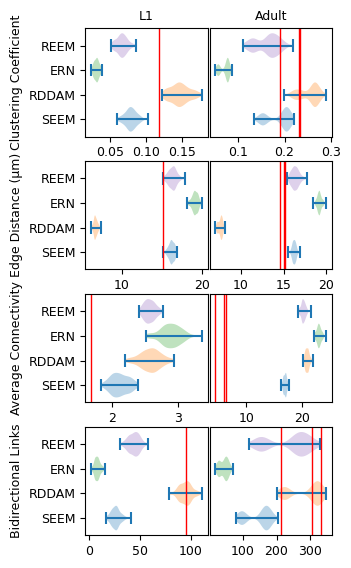

<Figure size 640x480 with 0 Axes>

In [35]:
%store -r SEEM_Array_Witvliet_Rand SEEM_White_Rand

graphs_L1 = [SEEM_Array_Witvliet[0], RDDAM_Graphs_W1, rand_Graphs_W1]#, SEEM_Array_Witvliet_Rand[0]]

seemAdult = SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White
rddaAdult = RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White
randAdult = rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White
reemAdult = SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand

graphs_adult = [seemAdult, rddaAdult, randAdult]#, reemAdult]

averages_L1 = [G_W1]
averages_adult = [G_W7, G_W8, G_White]

violinPlot()

plt.show()

# violinPlot(graphs_adult, averages_adult, 'Adults', ticks=False)